# 3. Polynomial Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('PolynomialRegressionData.csv')
dataset.head()

,hour,score
0,0.2,2
1,0.5,4
2,0.8,6
3,0.9,4
4,1.2,6


In [3]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## 3-1. 단순 선형 회귀 (simple linear regression)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression()

### 데이터 시각화

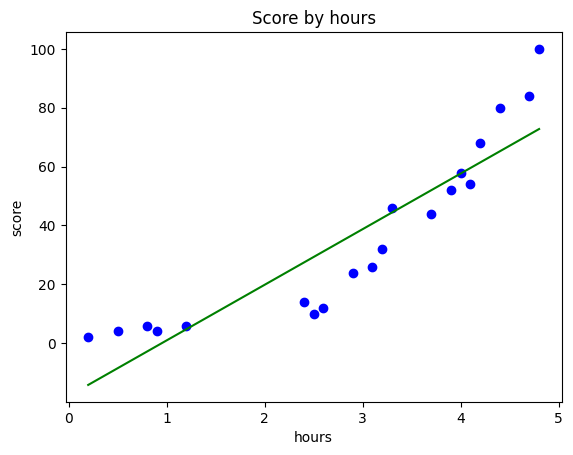

In [6]:
plt.scatter(X,y,color='b')
plt.plot(X,reg.predict(X),color='g')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [7]:
reg.score(X,y)

0.8169296513411765

## 3-2. 다항회귀 (polynomial regression)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
X_poly[:5] # x^0 + x^1 + x^2 ...

array([[1.0000e+00, 2.0000e-01, 4.0000e-02, 8.0000e-03, 1.6000e-03],
       [1.0000e+00, 5.0000e-01, 2.5000e-01, 1.2500e-01, 6.2500e-02],
       [1.0000e+00, 8.0000e-01, 6.4000e-01, 5.1200e-01, 4.0960e-01],
       [1.0000e+00, 9.0000e-01, 8.1000e-01, 7.2900e-01, 6.5610e-01],
       [1.0000e+00, 1.2000e+00, 1.4400e+00, 1.7280e+00, 2.0736e+00]])

In [10]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [11]:
poly_reg.get_feature_names_out()

array(['1', 'x0', 'x0^2', 'x0^3', 'x0^4'], dtype=object)

In [12]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y) # 변환된 x와 y로 학습

LinearRegression()

### 데이터 시각화

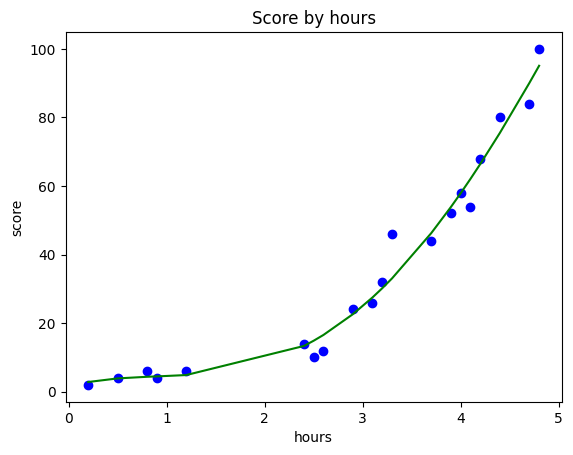

In [13]:
plt.scatter(X,y,color='b')
plt.plot(X,lin_reg.predict(poly_reg.fit_transform(X)),color='g')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [14]:
X_range = np.arange(min(X),max(X),0.1) 
X_range

array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4,
       1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
       2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
       4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7])

In [15]:
X_range.shape

(46,)

In [16]:
X[:5]

array([[0.2],
       [0.5],
       [0.8],
       [0.9],
       [1.2]])

In [17]:
X_range = X_range.reshape(-1,1)
X_range

array([[0.2],
       [0.3],
       [0.4],
       [0.5],
       [0.6],
       [0.7],
       [0.8],
       [0.9],
       [1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7]])

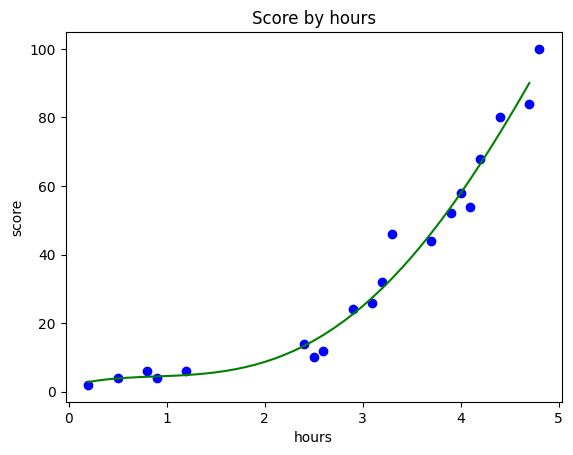

In [18]:
plt.scatter(X,y,color='b')
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)),color='g')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 공부시간에 따른 시험성적 예측

In [19]:
reg.predict([[2]]) # 2시간 공부했을때 선형회귀예측값

array([19.85348988])

In [20]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간 공부했을때 다항회귀 예측값

array([8.70559135])

In [21]:
lin_reg.score(X_poly,y)

0.9782775579000045

### 과대,과소 적합

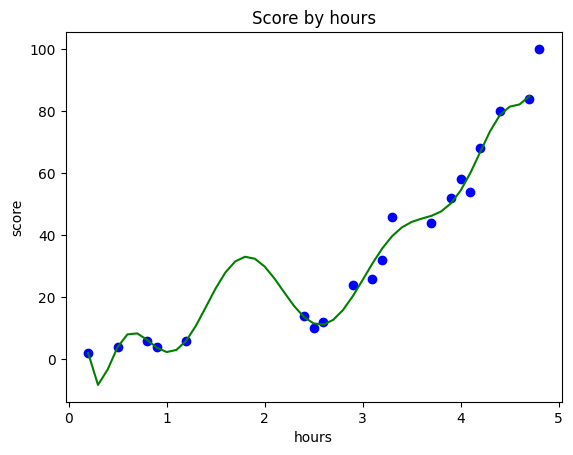

In [22]:
poly_reg = PolynomialFeatures(degree=10)
X_poly = poly_reg.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
plt.scatter(X,y,color='b')
plt.plot(X_range,lin_reg.predict(poly_reg.fit_transform(X_range)),color='g')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [23]:
lin_reg.predict(poly_reg.fit_transform([[2]])) # 2시간 공부했을때 다항회귀 예측값

array([29.89734752])